
# Линейная регрессия  
Сегодня пойдет речь о регрессии, как обучать и какие проблемы могут вам попасться при использовании таких моделей.

Для начала давайте введем удобные обозначения. 

$\mathbb{X} - \text{пространство объектов}$

$\mathbb{Y} - \text{пространство ответов}$

$ x = (x^1, ... x^n) - \text{признаковое описание объекта}$

$ X = (x_i,y_i)^l_{i=1} - \text{обучающая выборка} $

$ a(x) - \text{алгоритм, модель} $

$ Q(a,X) - \text{функция ошибки алгоритма a на выборке X} $

$  \text{Обучение} - a(x) = \text{argmin}_{a \in \mathbb{A}} Q(a,X)$

Но этого мало, давайте разберем, что такое функционал ошибки, семейство алгоритмов, метод обучения.
- **Функционал ошибки** Q: способ измерения того, хорошо или плохо работает алгоритм на конкретной выборке
- **Семейство алгоритмов** $\mathbb{A}$: как выглядит множество алгоритмов, из которых выбирается лучший
- **Метод обучения**: как именно выбирается лучший алгоритм из семейства алгоритмов.

### Пример задачи регрессии: предсказание количества заказов магазина

Пусть известен один признак - расстояние кафе от метро, а предсказать необходимо количество заказов. Поскольку количество заказов - вещественное число $\mathbb{R}$, здесь идет речь о задаче регрессии.

![chart](img/chart.png)

По графику можно сделать вывод о существование зависимости между расстоянием от метро и количеством заказов. Можно предположить, что зависимость линейна, ее можно представить в видео прямой на графике. По этой прямой и можно будет предсказывать количество заказов, если известно расстояние от метро.

В целом такая модель угадывает тенденцию, то есть описывает зависимость между ответом и признаком. 
При этом, разумеется ,она делает это не идеально, с некоторой ошибкой. Истинный ответ на каждом объекте несколько отклоняется от прогноза.

Один признак - это несерьезно. Гораздо сложнее и интереснее работать с многомерными выборками, которые описываются большим количеством признаков. В этом случае отобразить выборку и понять, подходит ли модель или нет, нельзя. Можно лишь оценить ее качество и по нему уже понять, подходит ли эта модель.

### Описание линейной модели

Давайте обсудим, как выглядит семейство алгоритмов в случае с линейными моделями. Линейный алгоритм в задачах регрессии выглядит следующим образом

$$ a(x)=w_0 + \sum\limits_{j=1}^d w_j x^j $$

где $w_0$ - свободный коэффициент, $x^j$ - признаки, а $w_j$ - их веса.

Если у нашего набора данных есть только один признак, то алгоритм выглядит так

$$ a(x)=w_0 + w x $$

Ничего не напоминает? Да, действительно это обычная линейная функция, известная с 7 класса.

$$ y = kx+b $$


В качестве меры ошибки мы не может быть выбрано отклонение от прогноза $Q(a,y)=a(x)-y$, так как в этом случае минимум функционала не будет достигаться при правильном ответе $a(x)=y$. Самый простой способ - считать модуль отклонения.

$$ |a(x)-y| $$

Но функция модуля не является гладкой функцией, и для оптимизации такого функционала неудобно использовать градиентные методы. Поэтому в качестве меры ошибки часто используют квадрат отклонения: 

$$ (a(x)-y)^2 $$

Функционал ошибки, именуемый среднеквадратичной ошибкой алгоритма, задается следующим образом:

$$ Q(a,x) = \frac{1}{l} \sum\limits_{i=1}^l (a(x_i)- y_i)^2 $$

В случае линейной модели его можно переписать в виде функции (поскольку теперь Q зависит от вектора, а не от функции) ошибок:
$$ Q(\omega,x) = \frac{1}{l} \sum\limits_{i=1}^l ( \langle w_i,x_i\rangle- y_i) ^2 $$ 




### Обучение модели линейной регрессии


Разберем том, как обучать модель линейной регрессии, то есть как настраивать ее параметры.
$$ Q(w,x) = \frac{1}{l} \sum\limits_{i=1}^l ( \langle w_i,x_i\rangle- y_i) ^2 \to \min_{w}$$ 

То есть нам необходимо подобрать $w$, что бы линия могла описать наши данные. Или же задача состоит в нахождение таких $w$, что бы была минимальна ошибка $ Q(w,x)$


### Матричная форма записи
Прежде, чем рассмотрим задачу о оптимизации этой функции, имеет смысл используемые соотношения в матричной форме. Матрица "объекты-признаки" $X$ составлена из признаков описаний все объектов выборки

$$ X = \begin{pmatrix} x_{11} & ... & x_{1d} \\ ... & ... & ... \\ x_{l1} & ... & x_{ld}  \end{pmatrix} $$

Таким образом, в $ij$ элементе матрицы $X$ записано значение $j$-го признака на i объекте обучающей выборки. Или короче говоря, каждая строчка - это объект, а каждый столбец - это признак.Так же понадобится вектор ответов y, который составлен из истинных ответов для всех объектов.

$$ y = \begin{pmatrix} y_{1} \\ ...\\ y_{l} \end{pmatrix}  $$

В этом случае среднеквадратичная шибка может быть переписана в матричном виде: 

$$ Q(w,X) = \frac{1}{l} || Xw-y ||^2 \to \min_{w}$$ 



### Оптимизационный метод решения 
Самый лучший метод - это численный метод оптимизации. 

Не сложно показать, что среднеквадратичная ошибка - это [выпуклая](https://www.google.com/search?q=%D0%B2%D1%8B%D0%BF%D1%83%D0%BA%D0%BB%D0%B0%D1%8F+%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F&ie=utf-8&oe=utf-8&client=firefox-b-ab) и [гладкая функция](https://www.google.com/search?client=firefox-b-ab&ei=pGe2W_nfBanrrgSj26jQDw&q=%D0%B3%D0%BB%D0%B0%D0%B4%D0%BA%D0%B0%D1%8F+%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F&oq=%D0%B3%D0%BB%D0%B0%D0%B4%D0%BA%D0%B0%D1%8F+%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F&gs_l=psy-ab.3..0i71k1l8.39617.39617.0.39796.0.0.0.0.0.0.0.0..0.0....0...1c.2.64.psy-ab..0.0.0....0.tajPqE40fXU). Выпуклость гарантирует существование лишь одного минимумам, а гладкость - существование вектора градиента в каждой точке. Это позволяет использовать метод градиентного спуска.

При использовании метода градиентного спуска необходимо указать начальное приближение. Есть много
подходов к тому, как это сделать, в том числе инициализировать случайными числами (не очень большими). Самый простой способ это сделать — инициализировать значения всех весов равными нулю:

$$ w^0=0 $$

На каждой следующей итерации, $t = 1, 2, 3, ...,$ из приближения, полученного в предыдущей итерации $w^{t−1}$, вычитается вектор градиента в соответствующей точке $w^{t−1}$, умноженный на некоторый коэффициент $\eta_t$, называемый шагом:

$$ w^t = w^{t-1} - \eta_t \Delta Q(w^{t-1},X) $$

Остановить итерации следует , когда наступает сходимость. Сходимость можно определять по-разному .В данном случае разумно определить сходимость следующим образом: итерации следует завершить, если разница
двух последовательных приближений не слишком велика:

$$ ||w^t - w^{t-1} ||<\epsilon $$

### Случай парной регрессии
В случае парной регрессии признак всего один, а линейная модель выглядит следующим образом:
$$ a(x)=w_0 + w x $$
где $w_1$ и $w_0$ - два параметра.
Среднеквадратичная ошибка принимает вид:

$$ Q(w_0,w_1,X) = \frac{1}{l} \sum\limits_{i=1}^l (w_1x_i+w_0 -y_i) ^2$$ 

Для нахождения оптимальных параметров будет применяться метод градиентного спуска, про который уже было сказано ранее. Чтобы это сделать, необходимо сначала вычислить частные производные функции ошибки:

$$\frac{\partial Q}{\partial w_1} = \frac{2}{l} \sum\limits_{i=1}^l (w_1x_i+w_0-y_i)x_i$$

$$\frac{\partial Q}{\partial w_0} = \frac{2}{l} \sum\limits_{i=1}^l (w_1x_i+w_0-y_i)$$

Следующие два графика демонстрируют применение метода градиентного спуска в случае парной регрессии. Справа изображены точки выборки, а слева — пространство параметров. Точка в этом пространстве обозначает конкретную модель (кафе)

![Example](img/exmpl.gif)

График зависимости функции ошибки от числа произведенных операции выглядит следующим образом:
![Example](img/erorr_in_count.png)

### Выбор размера шага в методе градиентного спуска
Очень важно при использовании метода градиентного спуска правильно подбирать шаг. Каких-либо концерт- иных правил подбора шага не существует, выбор шага — это искусство, но существует несколько полезных закономерностей.

![Example](img/gardient_step.png)


Если длина шага слишком мала, то метод будет неспешна, но верно шагать в сторону минимума. Если же
взять размер шага очень большим, появляется риск, что метод будет перепрыгивать через минимум. Более
того, есть риск того, что градиентный спуск не сойдется.

Имеет смысл использовать переменный размер шага: сначала, когда точка минимума находится еще да-
легко, двигаться быстро, а позже, спустя некоторое количество итерации — делать более аккуратные шаги.
Один из способов задать размер шага следующий:

$$ \eta_t = \frac{k}{t} $$

где $k$-константа, которую необходимо подобрать, а $t$ - номер шага. 


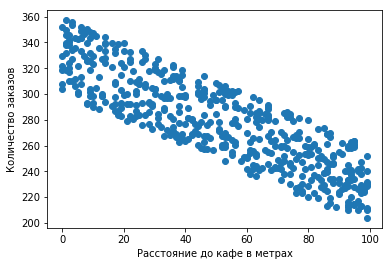

In [25]:
import matplotlib.pyplot as plt # библиотека для отрисовки графиков
import numpy as np # импортируем numpy для создания своего датасета 
from sklearn import linear_model, model_selection # импортируем линейную модель для обучения и библиотеку для разделения нашей выборки
X = np.random.randint(100,size=(500, 1)) # создаем вектор признаков, вектора так как у нас один признак 
y = np.random.normal(np.random.randint(300,360,size=(500, 1))-X) # создаем вектор ответом  
plt.scatter(X, y) # рисуем график точек
plt.xlabel('Расстояние до кафе в метрах') # добавляем описание для оси x
plt.ylabel('Количество заказов')# добавляем описание для оси y
plt.show()

In [26]:
# Делим созданную нами выборку на тестовую и обучающую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y) 

Давайте посмотрим какие параметры принимает **LinearRegression**.

**fit_intercept** - подбирать ли значения для свободного член $w_0$. `True` или `False`. Если ваши данные центрированны, то можете указать  False. **По умолчанию** - `True`<br/>
**normalize**- нормализация данных перед обучением. Если **fit_intercept=False** то параметр будет проигнорирован. Если `True` - то данные перед обучением будут нормализованы при помощи L^2-Norm нормализации. **По умолчанию -** `False`<br/>
**copy_X** - `True` - копировать матрицу признаков. `False` - не копировать. **По умолчанию - **`True`<br/>
**n_jobs** - количество ядер используемых для сборки. Скорость будет существенно выше n_targets>1. **По умолчанию -** `None`<br/>


Параметры которые можно у модели:

**coef_** - коэффициенты $w$, количество возвращаемых коэффициентов зависит от количества признаков. смотри пункт Описание линейной модели

**intercept_** - свободный член $w_0$


Что бы предсказать значения необходимо вызвать функцию:
**predict** и передать массив из признаков. 

Example: `regr.predict([[40]])`

In [27]:
regr = linear_model.LinearRegression() # создаем линейную регрессию 
#Обучаем модель
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

После выполнения кода, вам вернется ответ с установленными параметрами

`LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)`

In [4]:
# Посмотрим какие коэффициенты установила модель
print('Коэфициент: \n', regr.coef_)
# Средний квадрат ошибки
print("Средний квадрат ошибки: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Оценка дисперсии: 1 - идеальное предсказание. Качество предсказания.
print('Оценка дисперсии:: %.2f' % regr.score(X_test, y_test))

Коэфициент: 
 [[-1.03950324]]
Средний квадрат ошибки: 325.63
Оценка дисперсии:: 0.70


In [28]:
# Посмотрим на получившуюся функцию 
print ("y = {:.2f}*x + {:.2f}".format(regr.coef_[0][0], regr.intercept_[0]))

y = -1.00*x + 329.48


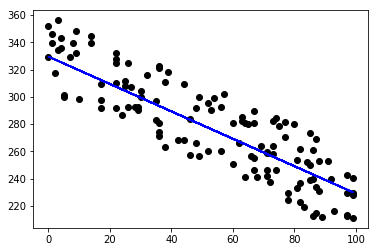

In [29]:
# Посмотрим, как предскажет наша модель тестовые данные.
plt.scatter(X_test, y_test, color='black')# рисуем график точек
plt.plot(X_test, regr.predict(X_test), color='blue') # рисуем график линейной регрессии 
plt.show() # Покажем график 

Давайте предскажем количество заказов, для нашего потенциального магазина. Скажем, что мы планируем построить магазин в 40 метрах от метро

In [7]:
regr.predict([[40]]) 

array([[288.13894078]])

290 заказов мы получим если построим магазин в 40 метрах от метро, но при этом качество предсказания всего лишь 71%, думаю не стоит доверять.

#### А что если, мы увеличим количество признаков?
Для этого воспользуемся встроенным датасетом `make_regression` из `sklearn`.

**n_features** - отвечает за количество признаков один нормальный другой избыточный<br>
**n_informative** - отвечает за количество информативных признаков<br>
**n_targets** - отвечает за размер ответов <br>
**noise** - шум накладываемый на признаки<br>
**соef** - возвращать ли коэффициенты <br>
**random_state** - определяет генерацию случайных чисел для создания набора данных.<br>

In [30]:
# Импортируем библиотеки для валидация, создания датасетов, и метрик качества
from sklearn import cross_validation, datasets, metrics

# Создаем датасет с избыточной информацией
X, y, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

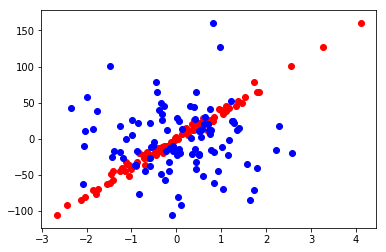

In [31]:
# Поскольку у нас есть два признака,для отрисовки надо их разделить на две части 
data_1, data_2 = [],[]
for x in X:
    data_1.append(x[0])
    data_2.append(x[1])
plt.scatter(data_1, y, color = 'r')
plt.scatter(data_2, y, color = 'b')

Можно заметить, что признак отмеченный красным цветом имеет явную линейную зависимость, а признак отмеченный синим, никакой информативность нам не дает.

In [32]:
# Разделение выборку для обучения и тестирования
# test_size - отвечает за размер тестовой выборки
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.3)

In [33]:
# Создаем линейную регрессию 
linear_regressor = linear_model.LinearRegression()
# Тренируем ее
linear_regressor.fit(X_train, y_train)
# Делаем предсказания
predictions = linear_regressor.predict(X_test)

In [34]:
# Выводим массив для просмотра наших ответов (меток)
print (y_test)

[ 28.15553021  38.36241814 -24.77820218 -61.47026695  13.02656201
  23.87701013  12.74038341 -70.11132234  27.83791274 -14.97110322
 -80.80239408  24.82763821  58.26281761 -45.27502383  10.33267887
 -48.28700118 -21.48288019 -32.71074998 -21.47606913 -15.01435792
  78.24817537  19.66406455   5.86887774 -42.44469577 -12.0017312
  14.76930132 -16.65927231 -13.99339669   4.45578287  22.13032804]


In [35]:
# Смотрим и сравниваем предсказания
print (predictions)

[ 22.32670386  40.26305989 -27.69502682 -56.5548183   18.47241345
  31.86585663   6.08896992 -66.15105402  22.99937016 -12.65174022
 -78.50894588  30.90311195  56.21877707 -47.81097232   8.98196478
 -56.41188567 -24.46096716 -43.55445698 -17.99670898  -9.09225523
  65.49657633  26.50900527   4.74114126 -39.28939851  -6.80665816
   8.30372903 -15.27594937 -15.15598987   8.34469779  19.45159738]


In [36]:
# Средняя ошибка предсказания 
metrics.mean_absolute_error(y_test, predictions)

4.568919119945587

Для валидации можем выполнить перекрестную проверкую `cross_val_score`.
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Передадим, нашу линейную модель, признаки, ответы, количество разделений кросс-валидация 

In [37]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, X, y, cv=10)
print ('Средняя ошибка: {}, Отклонение: {}'.format(linear_scoring.mean(), linear_scoring.std()))

Средняя ошибка: 0.9792410447209384, Отклонение: 0.020331171766276405


In [38]:
# Создаем свое тестирование на основе абсолютной средней ошибкой
scorer = metrics.make_scorer(metrics.mean_absolute_error)

In [39]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, X, y, scoring=scorer, cv=10)
print ('Средняя ошибка: {}, Отклонение: {}'.format(linear_scoring.mean(), linear_scoring.std()))

Средняя ошибка: 4.0700714987797, Отклонение: 1.0737104492890193


In [40]:
# Коэффициенты который дал обучающий датасет
coef

array([38.07925837,  0.        ])

In [41]:
# Коэффициент полученный при обучении
linear_regressor.coef_

array([38.18191713,  0.81751244])

In [42]:
# обученная модель так же дает свободный член
linear_regressor.intercept_

-0.6433147737798083

In [21]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [22]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 37.76*x1 + 0.17*x2 + -0.86


In [43]:
# Посмотрим качество обучения
print('Оценка дисперсии:: %.2f' % linear_regressor.score(X_test, y_test))

Оценка дисперсии:: 0.98


# Домашнее задание

Вы уже знаете как создать модель линейной регрессии, можете создать датасет.
Давайте посмотрим как влияет количество признаков на качество обучения линейной модели.

Скачайте этот файл, можете редактировать этот ноутбук, да бы уменьшить/увеличить количество признаков.

Будут вопросы пишите нам в [Slack](https://lambdamai.slack.com/) канал **#machine_learning**